In [93]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [94]:
from lib.detect import SmileDetector

In [95]:
detec = SmileDetector(ssd_weights_path="./lib/weights/detection_weights.pth", 
                      resnet_weights_path="./lib/weights/classification_weights.pth")

In [96]:
import cv2

In [125]:
im = cv2.imread("./selfie2.jpg")

In [126]:
rgb_image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)


In [127]:
import matplotlib.pyplot as plt

In [128]:
%matplotlib inline

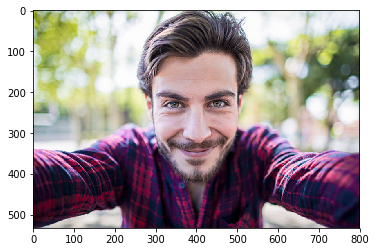

In [129]:
plt.imshow(rgb_image)

In [130]:
boxes = detec.detect_faces(im)

In [131]:
crops = detec.get_crops(im, boxes)

In [132]:
import numpy as np

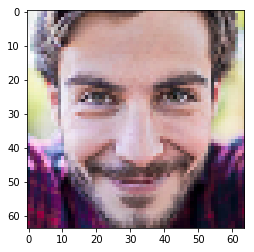

In [134]:
plt.imshow(crops[0])

In [135]:
preds = detec.predict_smiles(crops)

/home/johannes/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [136]:
preds

array([[0.83858794, 0.16141206]], dtype=float32)

In [159]:
import torch
from torch.autograd import Variable

In [160]:
xx = Variable(torch.unsqueeze(torch.from_numpy(crops[0]),0))

In [164]:
mean = [0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

In [165]:
import torchvision

In [166]:
transform = torchvision.transforms.Normalize(mean,std)

In [171]:
transform(xx.data[0])


(0 ,.,.) = 
   360.3275   587.4017   709.6725  ...    141.9869   146.3537   141.9869
   342.8603   609.2358   705.3057  ...    146.3537   146.3537   141.9869
   325.3930   617.9694   709.6725  ...    137.6201   137.6201   137.6201
               ...                  ⋱                 ...               
   307.9258   233.6900    32.8166  ...    836.3101   329.7598   469.4978
   316.6594    89.5852    28.4498  ...    360.3275   639.8035   508.7991
   251.1572    50.2838    41.5502  ...    604.8690   434.5633   312.2926

(1 ,.,.) = 
   431.0000   663.1429   806.0000  ...    167.6071   167.6071   167.6071
   422.0714   685.4643   797.0714  ...    167.6071   167.6071   163.1429
   413.1429   703.3214   801.5357  ...    158.6786   158.6786   158.6786
               ...                  ⋱                 ...               
   346.1786   247.9643    42.6071  ...    877.4286   372.9643   515.8214
   359.5714   100.6429    33.6786  ...    399.7500   698.8572   573.8572
   288.1429    60.4643   

In [141]:
classifier_model(xx)

/home/johannes/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Variable containing:
-0.0012 -6.7427
[torch.FloatTensor of size 1x2]

In [143]:
preds

array([[9.9882048e-01, 1.1794897e-03],
       [9.9999964e-01, 3.3847257e-07],
       [9.9998748e-01, 1.2516000e-05]], dtype=float32)

In [13]:
boxes

[(107, 81, 182, 250), (468, 123, 184, 239), (357, 133, 35, 38)]

In [30]:
crops[2].shape

(64, 64, 3)

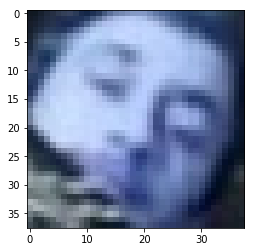

In [18]:
plt.imshow(crops[2])

In [67]:
box = boxes[1]

In [68]:
box

(468, 123, 184, 239)

In [69]:
center = (int(box[0] + 0.5*box[2]), int(box[1] + 0.5*box[3]))

In [71]:
im.shape

(366, 650, 3)

In [72]:
center

(560, 242)

In [22]:
longer_side = max(box[2],box[3])


In [23]:
longer_side

239

In [26]:
hand_crop = rgb_image[int(center[0] - 0.5*longer_side):int(center[0] + 0.5*longer_side), int(center[1] - 0.5*longer_side):int(center[1] + 0.5*longer_side)]


In [27]:
hand_crop.shape

(0, 239, 3)

In [35]:
rgb_image.shape

(366, 650, 3)

In [80]:
xmin = max(int(center[0] - 0.5 * longer_side), 0)
xmax = min(int(center[0] + 0.5 * longer_side), im.shape[1] - 1)
ymin = max(int(center[1] - 0.5 * longer_side), 0)
ymax = min(int(center[1] + 0.5 * longer_side), im.shape[0] - 1)

In [81]:
im.shape

(366, 650, 3)

In [82]:
ymin

122

In [83]:
ymax

361

In [84]:
xmin

440

In [85]:
xmax

649

In [86]:
crop = rgb_image[ymin:ymax, xmin:xmax]


In [145]:
crop.shape

NameError: name 'crop' is not defined

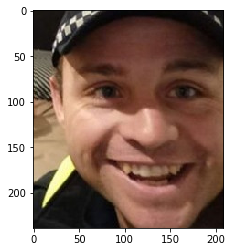

In [88]:
plt.imshow(crop)

In [54]:
im.shape

(366, 650, 3)

In [23]:
hand_crop = rgb_image[]
plt.imshow(hand_crop)

SyntaxError: invalid syntax (<ipython-input-23-d32f30258a7a>, line 1)